In [1]:
import numpy as np
import load_data
import scipy
import time
import pandas as pd
import statistic
import os
from joblib import dump, load

###### read data

In [2]:
map_label = load_data.read_map(load_data.test_map_path)
origin_train_data, origin_train_label = load_data.read_data(load_data.train_data_path, load_data.train_label_path)
origin_test_data, origin_test_label = load_data.read_data(load_data.test_data_path, load_data.test_label_path)
words_list = load_data.read_words(load_data.vocabulary_path)

###### separate the training set into training set and validation set

In [3]:
train_data, train_label, val_data, val_label = load_data.spearate(origin_train_data, origin_train_label)

###### show one data

In [4]:
load_data.show_data(train_data[1], words_list, train_label[1], map_label)

data label: sci.space
of:10 and:6 other:1 the:18 in:5 to:8 it:4 on:3 but:3 is:4 people:5 get:1 com:2 for:1 one:3 by:2 based:1 an:1 be:2 they:2 that:4 all:1 this:3 use:1 many:1 at:1 very:1 he:1 rather:1 had:1 as:6 man:1 right:2 only:1 work:2 also:2 number:2 think:1 was:2 were:1 through:2 those:1 compared:1 hand:2 not:1 mind:1 article:1 edu:1 writes:1 could:2 did:1 things:2 put:1 together:1 just:1 much:1 simply:1 no:1 little:1 out:1 keep:1 same:1 ve:1 how:1 before:2 account:1 result:1 yet:1 during:2 basically:1 cited:1 considered:1 gets:1 given:1 none:1 whole:1 bad:1 problem:1 correct:1 nowhere:1 process:2 pre:1 feel:1 got:1 noted:1 level:3 apr:1 give:1 tools:2 hard:1 major:2 hundreds:1 lot:1 mentioned:1 care:2 force:1 cut:1 runs:1 ignorance:1 effort:1 pressure:1 rated:1 heard:1 among:1 attack:1 fred:3 loving:1 worked:1 development:1 starting:1 zoo:1 typically:1 mostly:1 exemplary:1 near:1 simulations:2 counted:1 afford:1 elsewhere:1 failures:2 sophisticated:2 experiments:1 zero:1 failur

###### statistic method before training

###### 0. baseline

In [5]:
def baseline_train(name):
    label_number = list()
    for i in range(1, 21):
        label_number.append(np.sum(i == train_label))
    predict_label = np.argmax(label_number) + 1
    train_prediction = np.ones(shape=(len(train_label))) * predict_label
    
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_prediction = np.ones(shape=(len(val_label))) * predict_label
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")

baseline_train("trivial")

accuracy on train set is: 0.054
accuracy on validation set is: 0.049


###### 1. SVM

SVM classifier document: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

train on training set with linear kernel

In [22]:
from sklearn.svm import SVC

def SVM_train(name, **kwargs):
    """
    test for one SVM method
    """
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    svc = SVC(**kwargs)
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        svc = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        svc.fit(train_data_matrix, train_label)
        dump(svc, model_path) 
        print("training complete")
    
    train_prediction = svc.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = svc.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")

In [24]:
def start_SVM():
    """
    test all SVM
    """
    print("start SVM linear kernel")
    SVM_train(name="SVM_linear", kernel="linear")
    print("start SVM sigmoid kernel")
    SVM_train(name="SVM_sigmoid", kernel="sigmoid")
    print("start SVM RBF kernel with auto gamma = 1/features")
    SVM_train(name="SVM_RBF_auto", kernel="rbf", gamma="auto")
    print("start SVM RBF kernel with gamma = 0.1")
    SVM_train(name="SVM_RBF_0.1", kernel="rbf", gamma=0.1)
    print("start SVM poly kernel with degree = 3")
    SVM_train(name="SVM_poly_3", kernel="poly", degree=3) 

In [25]:
start_SVM()

start SVM linear kernel
load SVM_linear model
loading complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.728
start SVM sigmoid kernel
train SVM_sigmoid model
training complete
accuracy on train set is: 0.158
accuracy on validation set is: 0.154
start SVM RBF kernel with auto gamma = 1/features
train SVM_RBF_auto model
training complete
accuracy on train set is: 0.129
accuracy on validation set is: 0.110
start SVM RBF kernel with gamma = 0.1
train SVM_RBF_0.1 model
training complete
accuracy on train set is: 0.997
accuracy on validation set is: 0.081
start SVM poly kernel with degree = 3
train SVM_poly_3 model
training complete
accuracy on train set is: 0.163
accuracy on validation set is: 0.111


###### 2. Multiclass Logistic Regression

Multiclass Logistic Regression: https://refactored.ai/microcourse/notebook?path=content%2F06-Classification_models_in_Machine_Learning%2F02-Multivariate_Logistic_Regression%2Fmulticlass_logistic-regression.ipynb

In [26]:
from sklearn.linear_model import LogisticRegression

def MLR_train(name, **kwargs):
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    mlr = LogisticRegression(**kwargs)
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        mlr = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        mlr.fit(train_data_matrix, train_label)
        dump(mlr, model_path) 
        print("training complete")
    
    train_prediction = mlr.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = mlr.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")

In [27]:
def start_MLR():
    """
    test all MLR
    """
    print("start MLR with one vs. rest method")
    MLR_train(name="MLR_OVR", multi_class='ovr', max_iter=500)
    print("start MLR with multinomial newton-cg")
    MLR_train(name="MLR_Multi_Newton", multi_class='multinomial',solver='newton-cg', max_iter=500)
    print("start MLR with multinomial lbfgs")
    MLR_train(name="MLR_Multi_lbfgs", multi_class='multinomial',solver='lbfgs', max_iter=500)
    print("start MLR with multinomial sag")
    MLR_train(name="MLR_Multi_sag", multi_class='multinomial',solver='sag', max_iter=500)
    print("start MLR with multinomial saga")
    MLR_train(name="MLR_Multi_saga", multi_class='multinomial',solver='saga', max_iter=500)

In [28]:
start_MLR()

start MLR with one vs. rest method
train MLR_OVR model
training complete
accuracy on train set is: 0.998
accuracy on validation set is: 0.843
start MLR with multinomial newton-cg
train MLR_Multi_Newton model
training complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.829
start MLR with multinomial lbfgs
train MLR_Multi_lbfgs model
training complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.829
start MLR with multinomial sag
train MLR_Multi_sag model


D:\programming\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


training complete
accuracy on train set is: 0.801
accuracy on validation set is: 0.712
start MLR with multinomial saga
train MLR_Multi_saga model


D:\programming\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


training complete
accuracy on train set is: 0.738
accuracy on validation set is: 0.663


###### 3. Multinomial Naive Bayes


In [30]:
from sklearn.naive_bayes import MultinomialNB

def MNB_train(name):
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    mvb = MultinomialNB()
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        mvb = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        mvb.fit(train_data_matrix, train_label)
        dump(mvb, model_path) 
        print("training complete")
        
    train_prediction = mvb.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = mvb.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")

MNB_train("Multinomial_Naive_Bayes")

load Multinomial_Naive_Bayes model
loading complete
accuracy on train set is: 0.939
accuracy on validation set is: 0.854


###### 4. KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

def KNN_train(name, **kwargs):
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    knn = KNeighborsClassifier(**kwargs)
    
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        knn = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        knn.fit(train_data_matrix, train_label)
        dump(knn, model_path) 
        print("training complete")
    
    train_prediction = knn.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = knn.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")

In [32]:
def start_KNN():
    """
    test all MLR
    """
    print("start KNN neighbor = 3")
    KNN_train(name="KNN_3", n_neighbors=3)
    print("start KNN neighbor = 5")
    KNN_train(name="KNN_5", n_neighbors=5)
    print("start KNN neighbor = 7")
    KNN_train(name="KNN_7", n_neighbors=7)


In [33]:
start_KNN()

start KNN neighbor = 3
train KNN_3 model
training complete
accuracy on train set is: 0.716
accuracy on validation set is: 0.404
start KNN neighbor = 5
train KNN_5 model
training complete
accuracy on train set is: 0.666
accuracy on validation set is: 0.400
start KNN neighbor = 7
train KNN_7 model
training complete
accuracy on train set is: 0.627
accuracy on validation set is: 0.391


###### 5. Decision Tree, Random Forest, and Tr Ada Boost

- criterion is always "gini"
- max_depth is to all the leaf is pure
- max_feature is "sqrt" or default n_features

In [5]:
from sklearn.tree import DecisionTreeClassifier

def DecisionTree_train(name, **kwargs):
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    dt = DecisionTreeClassifier(**kwargs)
    
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        dt = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        dt.fit(train_data_matrix, train_label)
        dump(dt, model_path) 
        print("training complete")
    
    train_prediction = dt.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = dt.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")

In [35]:
def start_DecisionTree():
    """
    test all MLR
    """
    print("start DT default")
    DecisionTree_train(name="DT_nfeature")
    print("start DT max_features = sqrt")
    DecisionTree_train(name="DT_sqrt", max_features="sqrt")

In [37]:
start_DecisionTree()

start DT default
load DT_nfeature model
loading complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.584
start DT max_features = sqrt
load DT_sqrt model
loading complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.415


In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def DT_AdaBoost_train(name, n_estimators):
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    bdt_real = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2), n_estimators=n_estimators, learning_rate=1
    )
    
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        bdt_real = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        bdt_real.fit(train_data_matrix, train_label)
        dump(bdt_real, model_path) 
        print("training complete")
    
    train_prediction = bdt_real.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = bdt_real.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")
    

In [43]:
def start_DT_AdaBoost():
    """
    test all MLR
    """
    print("start AdaBoost n_estimators = 300")
    DT_AdaBoost_train(name="AdaBoost_300", n_estimators=300)
    print("start AdaBoost n_estimators = 600")
    DT_AdaBoost_train(name="AdaBoost_600", n_estimators=600)
    print("start AdaBoost n_estimators = 1000")
    DT_AdaBoost_train(name="AdaBoost_1000", n_estimators=1000)

In [44]:
start_DT_AdaBoost()

start AdaBoost n_estimators = 300
train AdaBoost_300 model
training complete
accuracy on train set is: 0.439
accuracy on validation set is: 0.375
start AdaBoost n_estimators = 600
train AdaBoost_600 model
training complete
accuracy on train set is: 0.432
accuracy on validation set is: 0.333
start AdaBoost n_estimators = 1000
train AdaBoost_1000 model
training complete
accuracy on train set is: 0.574
accuracy on validation set is: 0.425


In [45]:
from sklearn.ensemble import RandomForestClassifier


def RandomForest_train(name, **kwargs):
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    rf = RandomForestClassifier(**kwargs)
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        rf = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        rf.fit(train_data_matrix, train_label)
        dump(rf, model_path) 
        print("training complete")
    
    train_prediction = rf.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = rf.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")


In [46]:
RandomForest_train("random_forest")

train random_forest model
training complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.799


###### 6. multilayer perceptron

In [7]:
from sklearn.neural_network import MLPClassifier

    
def MLP_train(name, **kwargs):
    train_data_matrix = load_data.to_scipy_sparse_matrix(train_data, len(words_list)+1)
    mlp = MLPClassifier(**kwargs)
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        mlp = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        mlp.fit(train_data_matrix, train_label)
        dump(mlp, model_path) 
        print("training complete")
        
    train_prediction = mlp.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == train_label) / len(train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train.xlsx")
    
    val_data_matrix = load_data.to_scipy_sparse_matrix(val_data, len(words_list)+1)
    val_prediction = mlp.predict(val_data_matrix)
    val_accuracy = np.sum(val_prediction == val_label) / len(val_label)
    print("accuracy on validation set is: {:.3f}".format(val_accuracy))
    ratio_list = statistic.compare_prediction(val_prediction, val_label)
    statistic.save_to_file(name, ratio_list, val_accuracy, map_label.values(), "validation.xlsx")

In [50]:
def start_MLP():
    """
    test all MLR
    """
    print("MLP_train for no hidden layer")
    MLP_train(name="MLP_no_hidden", hidden_layer_sizes=set(), max_iter=100)
    print("MLP_train for hidden layer 100")
    MLP_train(name="MLP_100", max_iter=100)
    print("MLP_train for hidden layer 256")
    MLP_train(name="MLP_256", hidden_layer_sizes=(256, ), max_iter=100)


In [51]:
start_MLP()

MLP_train for no hidden layer
train MLP_no_hidden model


D:\programming\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


training complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.867
MLP_train for hidden layer 100
train MLP_100 model
training complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.865
MLP_train for hidden layer 256
train MLP_256 model
training complete
accuracy on train set is: 0.999
accuracy on validation set is: 0.877


###### statistic for the result

In [52]:
import matplotlib.pyplot as plt

In [56]:
train_result = pd.read_excel("train.xlsx")
sum_train_result = train_result[["method", "sum"]].to_numpy()

validation_result = pd.read_excel("validation.xlsx")
sum_validation_result = train_result[["method", "sum"]].to_numpy()

sort_index = np.lexsort((sum_validation_result[:,1],))
sum_train_result = sum_train_result[sort_index]
sum_validation_result = sum_validation_result[sort_index]

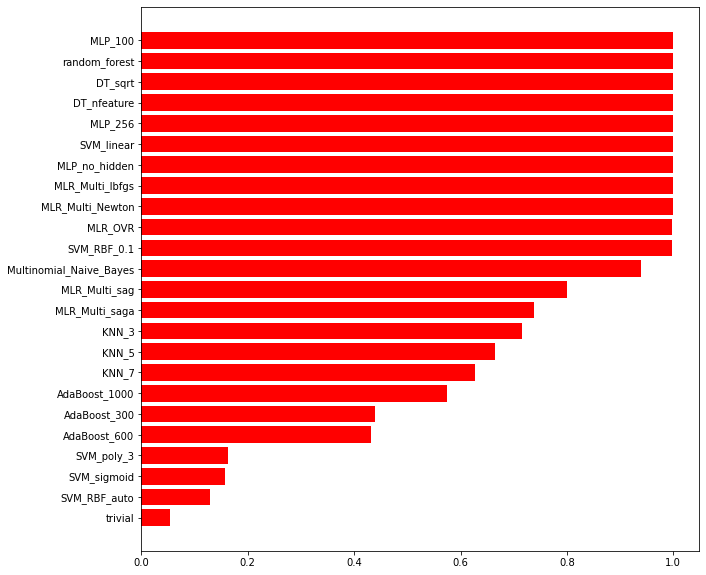

In [54]:
label = sum_train_result[:,0]
accuracy_train = sum_train_result[:,1]
accuracy_validation = sum_validation_result[:,1]


plt.figure(figsize=(10,10))
plt.barh(label, accuracy_train, color="b", align="center")
plt.barh(label, accuracy_validation, color="r", align="center")
plt.show()

###### final test on the test set

base line - trivial

In [217]:
def baseline_final(name):
    label_number = list()
    for i in range(1, 21):
        label_number.append(np.sum(i == origin_test_label))
    predict_label = np.argmax(label_number) + 1
    train_prediction = np.ones(shape=(len(origin_train_data))) * predict_label
    
    train_accuracy = np.sum(train_prediction == origin_train_label) / len(origin_train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, origin_train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train_final.xlsx")
    
    test_prediction = np.ones(shape=(len(origin_test_data))) * predict_label
    test_accuracy = np.sum(test_prediction == origin_test_label) / len(origin_test_label)
    print("accuracy on test set is: {:.3f}".format(test_accuracy))
    ratio_list = statistic.compare_prediction(test_prediction, origin_test_label)
    statistic.save_to_file(name, ratio_list, test_accuracy, map_label.values(), "test_final.xlsx")

baseline_final("trivial")

accuracy on train set is: 0.053
accuracy on test set is: 0.053


base line - non trivial - SVM

In [57]:
from sklearn.svm import SVC

def SVM_final(name):
    train_data_matrix = load_data.to_scipy_sparse_matrix(origin_train_data, len(words_list)+1)
    svc = SVC(kernel="linear")
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        svc = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        svc.fit(train_data_matrix, origin_train_label)
        dump(svc, model_path) 
        print("training complete")
        
    train_prediction = svc.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == origin_train_label) / len(origin_train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, origin_train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train_final.xlsx")
    
    test_data_matrix = load_data.to_scipy_sparse_matrix(origin_test_data, len(words_list)+1)
    test_prediction = svc.predict(test_data_matrix)
    test_accuracy = np.sum(test_prediction == origin_test_label) / len(origin_test_label)
    print("accuracy on test set is: {:.3f}".format(test_accuracy))
    ratio_list = statistic.compare_prediction(test_prediction, origin_test_label)
    statistic.save_to_file(name, ratio_list, test_accuracy, map_label.values(), "test_final.xlsx")

SVM_final("final_SVM_trivial")

train final_SVM_trivial model
training complete
accuracy on train set is: 0.999
accuracy on test set is: 0.629


final model - MLP with 100 node hidden layer

In [10]:
def MLP_final(name):
    train_data_matrix = load_data.to_scipy_sparse_matrix(origin_train_data, len(words_list)+1)
    mlp = MLPClassifier(hidden_layer_sizes=set(), max_iter=100)
    model_path = "model/SL/"+name+".joblib"
    if os.path.exists(model_path):
        print("load " + name + " model")
        mlp = load(model_path)
        print("loading complete")
    else:
        print("train " + name + " model")
        mlp.fit(train_data_matrix, origin_train_label)
        dump(mlp, model_path) 
        print("training complete")
    
    train_prediction = mlp.predict(train_data_matrix)
    train_accuracy = np.sum(train_prediction == origin_train_label) / len(origin_train_label)
    print("accuracy on train set is: {:.3f}".format(train_accuracy))
    ratio_list = statistic.compare_prediction(train_prediction, origin_train_label)
    statistic.save_to_file(name, ratio_list, train_accuracy, map_label.values(), "train_final.xlsx")
    
    test_data_matrix = load_data.to_scipy_sparse_matrix(origin_test_data, len(words_list)+1)
    test_prediction = mlp.predict(test_data_matrix)
    test_accuracy = np.sum(test_prediction == origin_test_label) / len(origin_test_label)
    print("accuracy on test set is: {:.3f}".format(test_accuracy))
    ratio_list = statistic.compare_prediction(test_prediction, origin_test_label)
    statistic.save_to_file(name, ratio_list, test_accuracy, map_label.values(), "test_final.xlsx")

MLP_final("final_MLP")

load final_MLP model
loading complete
accuracy on train set is: 0.999
accuracy on test set is: 0.761


###### generalization bound

In [231]:
N = train_data.shape[0]
delta = 0.1
C = 20
M = 24

validation_error_bound = np.sqrt(1/2/N * np.log(2*C*M/delta))
print("validation error bound is {:.3f}".format(validation_error_bound))

validation error bound is 0.023


In [232]:
N = origin_train_label.shape[0]
delta = 0.1
C = 20
M = 1

test_error_bound = np.sqrt(1/2/N * np.log(2*C*M/delta))
print("test error bound is {:.3f}".format(test_error_bound))

test error bound is 0.016
